# DSC 80: Homework 02

### Due Date: Monday, 01-21-2018 at Noon

## Instructions
Much like in DSC 10, this Jupyter Notebook contains the statements of the homework problems and provides code and markdown cells to display your answers to the problems. Unlike DSC 10, the notebook is *only* for displaying a readable version of your final answers. The coding work will be developed in an accompanying `hw02.py` file, that will be imported into the current notebook.

Homeworks and programming assignments will be graded in (at most) two ways:
1. The functions and classes in the accompanying python file will be tested (a la DSC 20),
2. The notebook will be graded (for graphs and free response questions).


**Do not change the function names in the `*.py` file**
- The functions in the `*.py` file are how your assignment is graded, and they are graded by their name. The dictionary at the end of the file (`GRADED FUNCTIONS`) contains the "grading list". The final function in the file allows your doctests to check that all the necessary functions exist.
- If you changed something you weren't supposed to, just use git to revert!

**Tips for working in the Notebook**:
- The notebooks serve to present you the questions and give you a place to present your results for later review.
- The notebook on *HW assignments* are not graded (only the `.py` file).
- Notebooks for PAs will serve as a final report for the assignment, and contain conclusions and answers to open ended questions that are graded.
- The notebook serves as a nice environment for 'pre-development' and experimentation before designing your function in your `.py` file.

**Tips for developing in the .py file**:
- Do not change the function names in the starter code; grading is done using these function names.
- Do not change the docstrings in the functions. These are there to tell you if your work is on the right track!
- You are encouraged to write your own additional functions to solve the HW! 
    - Developing in python usually consists of larger files, with many short functions.
    - You may write your other functions in an additional `.py` file that you import in `hw02.py` (much like we do in the notebook).
- Always document your code!

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import hw02 as hw

---

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np

# Flight Delays to/from San Diego

The department of transportation has all flight delays for listed years on their [website](https://catalog.data.gov/dataset/airline-on-time-performance-and-causes-of-flight-delays-on-time-data). The data `flights.csv` in the current directory is a subset of this data and consists of all flights either to or from SAN (San Diego) in 2015.

This full dataset has more columns than the dataset we looked at in the last homework.

In [ ]:
flights = pd.read_csv('flights.csv')
flights.head().T

### Data Types

The dataframe method `describe` gives descriptive statistics for all numeric variables. However, these statistics are only appropriate for quantitative variables.

**Question 1** 

Which of the numeric (i.e. `float`/`int`) columns in `flights` are *not* quantitative, as they are displayed in the table? That is, which columns *shouldn't* be included in the table of statistics below? 

Put your answer in the function `non_quant_numeric` of zero variables; it should return a list of column names.

In [ ]:
flights.describe().T

### Departure vs Arrival Delay

**Question 2** 

In the last HW, we only considered `DEPARTURE_DELAY` as the main cause of a flight delay -- that is, when the flight is late pushing off from the gate. However, there are other ways flights can be late: waiting on the tarmac, headwinds, turbulance, circling a busy airport, and waiting for a gate after landing. 

In this question, we'll analyze the assumptions of our analysis of delays on HW1 and take a look at all sources of delays.

* First create a function `depart_arrive_stats` that takes in a dataframe like `flights` and calculates the following quantities in a list (in the given order):
    - The proportion of flights from/to SAN that leave late, but arrive early or on-time.
    - The proportion of flights from/to SAN that leaves early, or on-time, but arrives late.
    - The proportion of flights from/to SAN that both left late and arrived late.
    
The last statistic is what we *wanted* to understand last time, but we didn't have the data to remove the flights in the first statistic. Additionally, we missed analyzing the delays considered in the middle statistics.

**Question 3**

Suppose people typically get to the airport 60 minutes before their scheduled flight departure. Define a derived field `TIME_AT_AIRPORT` defined as the minutes elapsed between arriving at the airport and actual departure.

The following fields contribute to the total time spent flying from point A to point B: `TIME_AT_AIRPORT`, `TAXI_OUT`, `AIR_TIME`, `TAXI_IN`. The number of minutes attributable to delay-related reasons is given in `ARRIVAL_DELAY`. 

Define a function `trip_breakdown` that takes in `flights` data and returns a dataframe with columns named `TIME_AT_AIRPORT`, `TAXI_OUT`, `AIR_TIME`, `TAXI_IN`, `ARRIVAL_DELAY`. 
* The first four columns should contain the proportion of the trip spent in each of the four activities. 
* The last column should contain the proportion of the trip that's attributable to delay-related reasons (if a flight arrived early, this should be negative; if our flight should've taken 1 hour and we arrived 30 minutes early, the proportion should be -0.5).

Once you've defined your function, plot the scatter-matrix below to anaylze how trip-delays are explainable by different parts of the trip.

In [ ]:
# this may take a while!
pd.plotting.scatter_matrix(hw.trip_breakdown(flights), figsize=(12,12));

### Null values in flight data

**Question 4**

* Create a function `prop_non_null` that takes in a dataframe like `flights` and returns a series whose values are the proportion of each field of `flights` which are non-null.
* Create a function `missing_types` of zero variables, which:
    - Returns a Series, indexed by the following columns of `flights`: `CANCELLED`, `AIRLINE_DELAY`, `CANCELLATION_REASON`, `TAIL_NUMBER`.
    - The values should contain the most-likely missingness type of each column. 
    - The unique values of this Series should be `MD, MCAR, MAR, MNAR, NaN`. 
    - Note: judging if a field is `MCAR` vs `MAR` vs `MNAR` *is* often a judgement call.
* The field `ARRIVAL_DELAY` is *missing by design*. Create a function `predict_null` that doesn't depend on the value of `ARRIVAL_DELAY`, that:
    - Takes in a row of the flights data (that is, a Series)
    - Returns `True` if the `ARRIVAL_DELAY` is null and otherwise `False`.
    - Since the function doesn't depend on `ARRIVAL_DELAY`, it should work a row, even if that index is dropped.
    - You can check your function by using `flights.drop('ARRIVAL_DELAY', axis=1).apply(predict_null, axis=1)`

### Flight delays and day of the week

**Question 5**

Next, we'd like to understand the flight traffic to/from SAN by day of the week. Day of the week is specified by integers 1 through 7; verify for yourself which integer corresponds to which day (hint: you have the *date* for each flight as well!).

Next create two functions to understand both the amount of traffic and the average flight delay of flights for each airline by day-of-the week. We both want to understand *presence* each airline has as well as their performance.

1. Create a function `cnts_by_airline_dow` that takes in a dataframe like `flights` and outputs a dataframe with 
    - a column for each distinct value of `AIRLINE`,
    - a row for each day of the week, and
    - entries that give the total number of flights that airline has on that day of the week over 2015.
2. Create a function `mean_by_airline_dow` that takes in a dataframe like `flights` and outputs a dataframe with 
    - a column for each distinct value of `AIRLINE`,
    - a row for each day of the week, and
    - entries that give the average `ARRIVAL_DELAY` for the flights of each airline on that day of the week.
    
*Hint:* Both `groupby` and `pivot` should be useful here!

Your output should have the *form* of the table below (not the entries!)

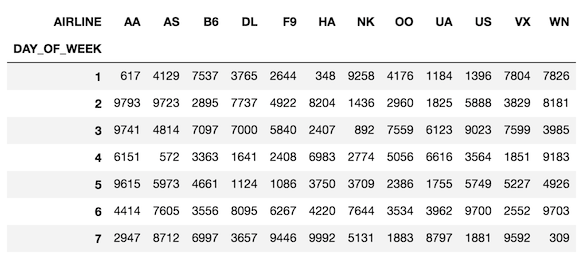

In [ ]:
# hw.cnts_by_airline_dow(flights)

In [ ]:
# hw.mean_by_airline_dow(flights)

# JetBlue vs Southwest

The csv file `southwest_vs_jetblue.csv` contains all Southwest and JetBlue flights in 2015 that originated in the following 10 airports: ABQ, BDL, BUR, DCA, MSY, PBI, PHX, RNO, SJC, SLC.

In [109]:
jb_sw = pd.read_csv('southwest_vs_jetblue.csv')

**Question 6**

Illustrate Simpson's paradox with this dataset:
* Calculate the proportion of each airline's flights that are delayed:
    - Create a function `prop_delayed_by_airline` that takes in a dataframe like `jb_sw` and returns a DataFrame indexed by airline that contains the proportion of each airline's flights that are delayed.
* Calculate these proportions across all airports in the dataset:
    - Create a function `prop_delayed_by_airline_airport` that takes in a dataframe like `jb_sw` and returns a DataFrame, with columns given by airports, indexed by airline, that contains the proportion of each airline's flights that are delayed at each airport.
    
Verify that Simpson's paradox is present in this output!

In [ ]:
# hw.prop_delayed_by_airline(jb_sw)

In [ ]:
# hw.prop_delayed_by_airline_airport(jb_sw)

**Question 7**

Next, use your work above to write a function that verifies Simpson's paradox in general. Create a function with boolean output that verifies Simpson's paradox:
```
verify_simpson(df, group1, group2, occur)
```
where,
* `df` is a dataframe (the dataset),
* `group1` is the first group being aggregated against,
* `group2` is the second group being aggregated against,
* `occur` is a column with values {0, 1}, denoting if an event occurred for that individual.

## College scorecard 

The college scorecard data set contains information collated by the government to enable people to makes informed decisions on which college to attend. We will study this dataset throughout the quarter.

See the website for more details: https://collegescorecard.ed.gov/data/

In [ ]:
college_url = 'https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Scorecard-Elements.csv'
colleges = pd.read_csv(college_url)

In [ ]:
colleges.head(2).T

Wow! That's a lot of columns!
If you'd like to see more rows/columns of a pandas dataframe by default, you can set them as follows:
```
pd.set_option('display.max_rows', 500)  # sets display to 500 rows
pd.set_option('display.max_columns', 100)  # sets display to 100 columns
```

Be careful setting these numbers too large (or to `None`, which shows all rows/columns) -- it's very easy to crash your browser from trying to display a very large dataframe.

* This data is short and wide: it has many attributes about a relatively few number of individuals (institutions).

In [ ]:
colleges.info()

To help understand what all these columns are, we can download the data dictionary directly:

In [ ]:
data_dict_url = 'https://collegescorecard.ed.gov/assets/CollegeScorecardDataDictionary.xlsx'
datadict = pd.read_excel(data_dict_url, sheet_name='data_dictionary')
datadict.head()

The college scorecard dataset has a number of 'integer-coded nominal fields'. Two of the most important codes are:
* `PREDDEG` is the "predominant degree type awarded" by the college, and
* `CONTROL` is the "control of the institution" (e.g. public school).

The mapping of integers ("value") to descriptions ("label") is given in the data-dictionary. We would like to replace the integers-codes in the `college` dataset with their string values to make it more readable.

**Question 8**

Create a function `translation_dict` that takes in a dataframe of the form of `datadict` and outputs a dictionary satisfying the following conditions:

1. The keys are the column names of `colleges` that are strings encoded as integers (i.e. columns for which `VALUE` and `LABEL` in `datadict` are non-empty).
2. The values are also dictionaries; each has keys given by `VALUE` and values `LABEL`.

Once this dictionary is constructed, it can be fed into Pandas DataFrame `.replace` method.

Now we can, for example, see the breakdown of "degrees granted" among all US institutions:

In [ ]:
trans_dict = hw.translation_dict(datadict)

In [ ]:
colleges.replace(trans_dict).PREDDEG.value_counts()

**Question 9**

The average net price of a Title IV institution is given by the fields `NPT4_PUB` (public) and `NPT4_PRIV` (private). 
* Create a function `merge_cost` that takes in a dataframe like `colleges` and outputs a column that contains average net price for both public and private Title IV institutions.
* Create a function `missing_cost_prop` that takes in a dataframe like colleges and a dataframe like `title4` and returns a list with two elements (in the following order):
    - What proportion of institutions don't report their average net price?
    - What proportion of those not reporting their average net price are title IV institutions?

You may find a list of all title IV institutions here: https://ifap.ed.gov/fedschcodelist/attachments/1920FedSchoolCodeList.xlsx

*Hint*: You do not need to use a join. The Series method `.isin(list)` is helpful!
    


In [ ]:
title4 = pd.read_excel('https://ifap.ed.gov/fedschcodelist/attachments/1920FedSchoolCodeList.xlsx')

**Question 10 (Extra Credit)**

*Explanation of Extra Credit*: The functions in the extra credit assignment should be saved in `extra-credit/ec_hw02py`. The extra credit on assignments in the course is due at the end of the quarter. However, you can frequently submit your work and it will get graded regularly. You are encouraged to work on these problems along with the assignment in which they are given!

This question deals with looking at a [streaming algorithm](https://en.wikipedia.org/wiki/Streaming_algorithm). These are necessary when the data you are dealing with are both too large to hold in memory *and* too large to pass over twice. This situation is very common with any near real-time processing of internet data.

Percentiles (e.g. median) are very useful statistics that require sorting data to accurately compute. Therefore, it's only possible to try to compute approximations of these statistics with streaming algorithms. Developing new approximations and understanding their quality is an active area of research in both academics and industry.

In this problem, you are going to explore a first (*not very good*) attempt at a streaming algorithm for the median. You will use it to estimate the median `ARRIVAL_DELAY` of `flights`. This is the general idea you'll implement:

1. Read in chunks of the data `N` lines at a time (e.g. using `pd.read_csv(fh, chunksize=N)`).
2. Calculate the median of this chunk and add it to a "list of medians".
3. Keep doing this; when the "list of medians" becomes size `k`:
    - take the median of the list of medians.
    - re-initialize the list of medians with only this median just computed


Create a function `approx_median` that takes in a file-handle `fh`, a column `col`, and the numbers `N` and `k`, and outputs the approximate median as described above.

Of course, the value of this approximate median depends on the order the data came in; we'd like to understand the dependency of this algorithm on the order of the dataset:

* Create a function `run_flight_experiments(fh, num_exper, N, k)` that takes in the `csv` data as a file handle, the number of experiments `num_exper`, and the parameters `N` and `k` above, and computes the 95% of confidence interval of the approximate median simulation on the `ARRIVAL_DELAY` column of the flights dataset.
    - *Hint:* you can shuffle your data using `dataframe.sample`
    - *Hints:* you can pass a dataframe directly into read_csv, by using `StringIO` on a string; you can write your dataframe to a string using the `.to_csv()` method without any arguments.


You should see how your results vary as `N` and `k` vary. `N=1000` and `k=3` are good starting points. What are the trade-offs of large/small `N` and `k` with repsect to computation and statistical accuracy?

* Create a function `approx_median_example` of zero variables that returns a dataframe `df` with one column `col` with the following property: the true median of `df[col]` is the max value `df[col]`, but the approximate median (`N=100` and `k=3`) is the min value of `df[col]`.

# Congratulations, your done with the homework

### Now, run your doctests and upload `hw02.py` to GradeScope.

